## Pobranie danych z pliku

In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')


In [3]:
print(data)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ... -2.10530535e-02
   1.49620000e+02  0.00000000e+00]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  1.47241692e-02
   2.69000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.97518406e-02
   3.78660000e+02  0.00000000e+00]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ... -2.65608286e-02
   6.78800000e+01  0.00000000e+00]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.04532821e-01
   1.00000000e+01  0.00000000e+00]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ...  1.36489143e-02
   2.17000000e+02  0.00000000e+00]]


## Wydzielenie zbiorów

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Inicjacja struktur danych do testów

In [5]:
scores_false_negative = []
scores_false_positive = []
methods = []

## Wybór modelu

### Sieć neuronowa z warstwą ukryta

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

neural_network = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(200,)))
neural_network.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, neural_network.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("Neural network")

c:\program files\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Las losowy

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

random_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("Random Forest")

c:\program files\python36\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


### Naiwny klasyfikator Bayesa

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

bayes = make_pipeline(StandardScaler(), GaussianNB())
bayes.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, bayes.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("Naive Bayes")

c:\program files\python36\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Kwadratowa analiza dyskryminacyjna

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

QDA = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())
QDA.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, QDA.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("QDA")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Regresja logistyczna

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, logistic_regression.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("Logistic regression")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### K najbliższych sąsiadów

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs=-1))
knn.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, knn.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("KNN")

c:\program files\python36\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


### Support vector classifier

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(), SVC())
svc.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, svc.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
methods.append("SVC")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Wyniki: false negative

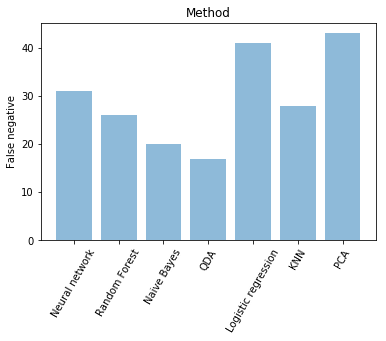

In [15]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()

## Wyniki: false positive

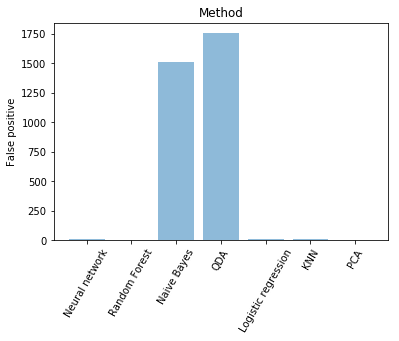

In [14]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False positive')
plt.title('Method')

plt.show()